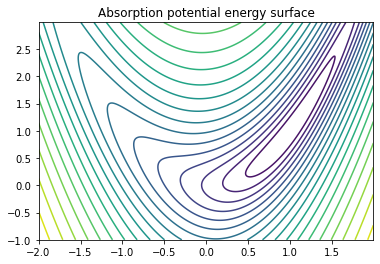

In [27]:
import matplotlib.pyplot as plt
import numpy as np

delta = 0.01 
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.log((2*(Y-X **2))**2 + (1 - X)**2 + 1)
levels = np.arange(0.0, 10.0, 0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 18)
ax.set_title('Absorption potential energy surface')

plt.show()

In [ ]:
# def energy(x, y):
#     x = np.array(x)
#     y = np.array(y)
#     z = np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)
#     return z
    
# def force(x, y):
#     x = np.array(x)
#     y = np.array(y)
#     vec=np.zeros((len(x),2))
#     for i in range(len(x)):
#         dx = (-16*x[i]*(y[i]-x[i]**2)+2*x[i] - 2)/(4*(y[i]-x[i]**2)**2 + (1 - x[i])**2 + 1)
#         dy = (8*(y[i] - x[i]**2))/(4*(y[i]-x[i]**2)**2 + (1 - x[i])**2 + 1)
#         vec[i] = [dx,dy]
#     return vec

In [ ]:
# import random
# delta = 0.1
# itert = 0

# a1 = np.arange(-2.0, 2.0, delta)
# a2 = np.arange(-1.0, 3.0, delta)
# x = random.sample(list(a1),10)
# y = random.sample(list(a2),10)
# # for i in range(10):
# #     list[i] = [x[i], y[i]]
# # print(x)
# # print(y)
# # force_all = force(x, y)
# # force_ave = np.linalg.norm(force_all)
# # energy_all = energy(x, y)
# # energy_ave = np.linalg.norm(energy_all)
# x_plot = []
# y_plot = []

# while force_ave > 0.01 and itert < 1000:
#     f = force(x, y)
# #     print(f[:,0],f[:,1])
# #     print(f[1])
#     for i in range(10):      
#         x_update = x - force_all[:,0]*delta
#         y_update = y - force_all[:,1]*delta
#         x = x_update
#         y= y_update
#         force_all = force(x_update, y_update)
#         force_ave = np.linalg.norm(force_all)
#         energy_all = energy(x_update, y_update)
#         energy_ave = np.linalg.norm(energy_all)
#         itert += 1
#         x_plot.append(itert)
#         y_plot.append(energy_ave)
# #     print(itert, force_ave)
    
    
# plt.figure()
# plt.plot(x_plot, y_plot)
# plt.xlabel('x')
# plt.ylabel('y')

# exercise 3

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [28]:
def energy(x, y):
    z = np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)
    return z
    
def force(x, y):
    x = np.array(x)
    y = np.array(y)
    
    dx = (-16*x*(y-x**2)+2*x - 2)/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    dy = (8*(y - x**2))/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    #vec[i] = np.sqrt(dx**2+dy**2)
    
    return [dx, dy]

In [25]:
vec_list = np.array(np.meshgrid(np.linspace(-1.8, 1.8,3), np.linspace(-0.8, 2.8, 3))).T.reshape(-1,2)
vec_list = np.append(vec_list, np.array([[0.1, 0.1]]), axis = 0)

#force_len = np.linalg.norm(force(x_val, y_val)) 
iteration_each_loop = []
step = 0.03 
force_all = []
energy_all = []

for i in range(len(vec_list)):   
    x_val = vec_list[i,0]
    y_val = vec_list[i,1]
    
    force_len = np.linalg.norm(force(x_val, y_val))
    force_vec =[]
    iteration = 0
    energy_each = []  
    while force_len > 0.01 and iteration < 1000:
        F = force(x_val, y_val) 
        update_x = x_val - F[0]*step
        update_y = y_val - F[1]*step

        x_val = update_x
        y_val = update_y
             
        iteration += 1
        force_len = np.linalg.norm(force(x_val, y_val))
        force_vec.append(force_len)
        #energy_each.append(np.linalg.norm(energy(x_val, y_val)))
        
    force_all.append(force_vec)
    energy_all.append(energy_each)
    iteration_each_loop.append(iteration)


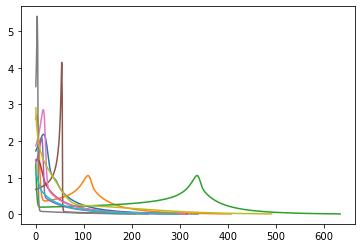

In [22]:
for i in range(len(iteration_each_loop)):
    plt.plot(range(iteration_each_loop[i]), force_all[i])
    
#np.mean(iteration_each_loop)

In [26]:
# for i in range(len(iteration_each_loop)):
#     plt.plot(range(iteration_each_loop[i]), energy_all[i])

# exercise4

In [ ]:
step = 0.03

x_val = vec_list[1,0]
y_val = vec_list[1,1]

force_vec =[]
iteration = 0

force_lin = force(x_val, y_val)

while force_len > 0.01 and iteration < 1000:
        F = force(x_val, y_val)
        update_x = x_val - F[0]*step
        update_y = y_val - F[1]*step

        x_val = update_x
        y_val = update_y
             
        iteration += 1
        force_len = np.linalg.norm(force(x_val, y_val))
        force_vec.append(force_len)
        

In [ ]:
def conjgrad(A, b, x):
    """
    A function to solve [A]{x} = {b} linear equation system with the 
    conjugate gradient method.
    More at: http://en.wikipedia.org/wiki/Conjugate_gradient_method
    ========== Parameters ==========
    A : matrix 
        A real symmetric positive definite matrix.
    b : vector
        The right hand side (RHS) vector of the system.
    x : vector
        The starting guess for the solution.
    """  
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(np.transpose(r), r)
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)
        x = x + np.dot(alpha, p)
        r = r - np.dot(alpha, Ap)
        rsnew = np.dot(np.transpose(r), r)
        if np.sqrt(rsnew) < 1e-8:
            break
        p = r + (rsnew/rsold)*p
        rsold = rsnew
    return x


# exercise5